In [11]:
from sympy import re, im, I, symbols, simplify,expand,diff,solve,sqrt, Abs,init_printing,Symbol,pi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

init_printing()

## Variables

In [12]:
R,R2, L, C, C0, w0= symbols('R R2 L C C0 w0',real=True,positive=True)
w=Symbol('w',real=True)
s=I*2*pi*w
C=C0
#w0=1/(sqrt(L*C0))

### La impedancia $Z(\omega)$

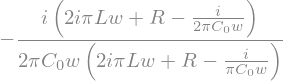

In [13]:
Z=1/(s*C0) * (R + s*L + 1/(s*C)) * 1/(R+s*L+1/(s*C)+1/(s*C0))
Z

### Calculo $|Z(\omega)|^2$

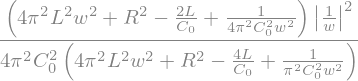

In [14]:
Z2=Abs(Z)**2
Z2

### Como $R^2 \ll L/C$ puedo sacarlo de la ecuación

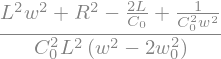

In [15]:
(L**2*w**2 + R**2 - 2*L/C0 + 1/(C0**2*w**2))/(C0**2 * L**2*(w**2 - 2*w0**2))

### Ahora veo un poco el comportamiento de las  partes $Re(Z)$ e $Im(Z)$ y busco los minimos del denominador en ambos casos

In [18]:
print(simplify(re(Z)))

R/(4*(pi**2*C0**2*R**2*w**2 + (2*pi**2*C0*L*w**2 - 1)**2))


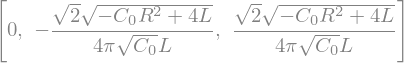

In [19]:
solve((pi**2*C0**2*R**2*w**2 + (2*pi**2*C0*L*w**2 - 1)**2).diff(w),w)

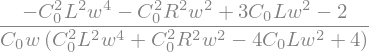

In [9]:
simplify(im(Z))

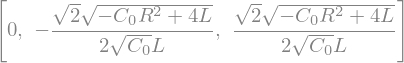

In [10]:
solve((C0**2*L**2*w**4 + C0**2*R**2*w**2 - 4*C0*L*w**2 + 4).diff(w),w)

In [1]:
w1=(sqrt(2)*sqrt(-C0*R**2 + 4*L)/(2*sqrt(C0)*L)).subs(L,10*1e-3).subs(C,100*1e-9).subs(R,12)
print(w1)
print('------------')
3161.70839895143*np.sqrt(2)/(2*pi)

NameError: name 'sqrt' is not defined

### Coparo esta frecuencia con la anti frecuencia donde $\omega_p=\omega_s \sqrt{1+\frac{C}{C_0}}$

In [100]:
print((sqrt(1/(L*C))*sqrt(1+C/C0)).subs(L,10*1e-3).subs(C,100*1e-9).subs(R,12))
print('------------')
31622.7766016838*np.sqrt(2)/(2*np.pi)

31622.7766016838*sqrt(2)
------------


### nada particular, por el momento no se se estan bien estos valores. Tranquilamente podria ser al antifrecuencia digamos.

### Calculo la transferencia
### La idea es calcular $T=\frac{|V_2|}{|V_1|}= \frac{|R_2|}{|R_2+Z|}$ para eso lo mejorque pude encontrar fue losiguiente

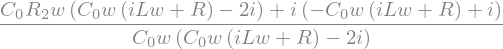

In [12]:
simRZ=simplify(R2+Z)
simRZ

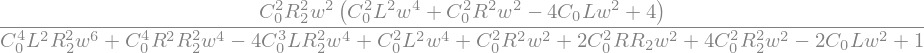

In [13]:
abRZ=Abs(R2/simRZ)**2
abRZ

In [14]:
print(abRZ)

C0**2*R2**2*w**2*(C0**2*L**2*w**4 + C0**2*R**2*w**2 - 4*C0*L*w**2 + 4)/(C0**4*L**2*R2**2*w**6 + C0**4*R**2*R2**2*w**4 - 4*C0**3*L*R2**2*w**4 + C0**2*L**2*w**4 + C0**2*R**2*w**2 + 2*C0**2*R*R2*w**2 + 4*C0**2*R2**2*w**2 - 2*C0*L*w**2 + 1)


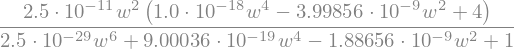

In [15]:
abRZ_ev=abRZ.subs(L,10*1e-3).subs(C,100*1e-9).subs(R,12).subs(R2,50)
abRZ_ev

Text(0, 0.5, 'Transf^2')

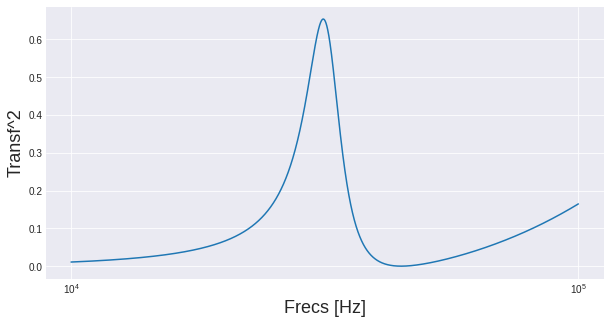

In [29]:
ws=np.linspace(1e4,1e5,10000)
tsf=2.5e-11*ws**2*(1.0e-18*ws**4 - 3.99856e-9*ws**2 + 4)/(2.5e-29*ws**6 + 9.00036e-19*ws**4 - 1.88656e-9*ws**2 + 1)

%matplotlib inline
plt.figure(figsize=(10,5))
plt.semilogx(ws,tsf)
plt.xlabel('Frecs [Hz]',fontsize=18)
plt.ylabel('Transf^2',fontsize=18)

### Busco entonces vercuando lafuncion del denominador se minimiza

In [16]:
mins=(C0**4*L**2*R2**2*w**6 + C0**4*R**2*R2**2*w**4 - 4*C0**3*L*R2**2*w**4 + C0**2*L**2*w**4 + C0**2*R**2*w**2 + 2*C0**2*R*R2*w**2 + 4*C0**2*R2**2*w**2 - 2*C0*L*w**2 + 1).diff(w)

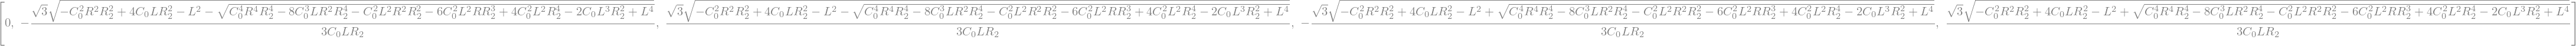

In [17]:
solve(mins,w)

### Agarro la unica frecuencia que parece ser positiva

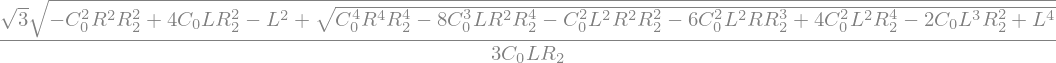

In [18]:
ww=simplify(sqrt(3)*sqrt(-C0**2*R**2*R2**2 + 4*C0*L*R2**2 - L**2 + sqrt(C0**4*R**4*R2**4 - 8*C0**3*L*R**2*R2**4 - C0**2*L**2*R**2*R2**2 - 6*C0**2*L**2*R*R2**3 + 4*C0**2*L**2*R2**4 - 2*C0*L**3*R2**2 + L**4))/(3*C0*L*R2))
ww

### Evaluo esta frecuencia en los valores que me da el enunciado

In [19]:
print(ww.subs(L,10*1e-3).subs(C,100*1e-9).subs(R,12).subs(R2,50))
print('--------------')
18311.105286091*np.sqrt(3)

18311.105286091*sqrt(3)
--------------


### Veo si $\omega_s=\sqrt(1/LC)$ da lo mismo o parecido 

In [20]:
LL=10*1e-3# Ohm * s
CC=100*1e-9# s / Ohm
np.sqrt(1/(LL*CC))

In [62]:
print(simplify(re(Z)))

R/(C0**2*R**2*w**2 + (C0*L*w**2 - 2)**2)


In [90]:
solut=solve((C0**2*R**2*w**2 + (C0*L*w**2 - 2)**2)*2-1/sqrt(2),w)
sols=[]
for sol in solut:
    sols.append(simplify(sol.subs(L,10*1e-3).subs(C,100*1e-9).subs(R,12)))
print(sols)

[-31622.7766016838*sqrt(1.99928 - 0.5*sqrt(-0.0115179264 + sqrt(2))), 31622.7766016838*sqrt(1.99928 - 0.5*sqrt(-0.0115179264 + sqrt(2))), -31622.7766016838*sqrt(0.5*sqrt(-0.0115179264 + sqrt(2)) + 1.99928), 31622.7766016838*sqrt(0.5*sqrt(-0.0115179264 + sqrt(2)) + 1.99928)]


In [92]:
31622.7766016838*np.sqrt(0.5*np.sqrt(-0.0115179264 + np.sqrt(2)) + 1.99928)/(2*np.pi)

In [91]:
31622.7766016838*np.sqrt(1.99928 - 0.5*np.sqrt(-0.0115179264 + np.sqrt(2)))/(2*np.pi)

In [97]:
w12=sqrt((R/(2*L))**2+1/(L*C0))+(R/(2*L))
w12.subs(L,10*1e-3).subs(C,100*1e-9).subs(R,12)/(2*np.pi)